In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv(r"C:\Users\evanj\Downloads\BCA Files\ML\ml_dataset\archive\winequality-red.csv")  # Ensure the file is in the same directory or provide the full path

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [94]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [95]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


In [96]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000         

In [97]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


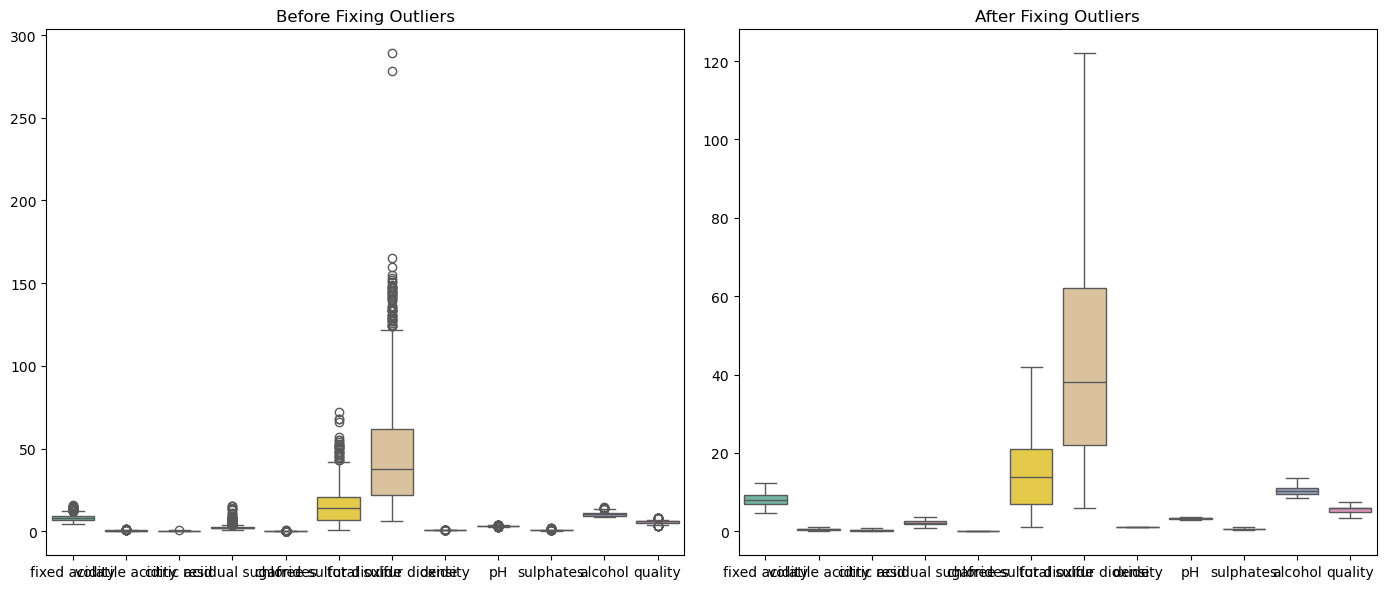

In [98]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to detect and fix outliers using IQR
def fix_outliers_iqr(df):
    df_fixed = df.copy()  # Create a copy to avoid modifying the original data
    for column in df.select_dtypes(include=np.number).columns:  # Only numeric columns
        Q1 = df[column].quantile(0.25)  # First quartile (25%)
        Q3 = df[column].quantile(0.75)  # Third quartile (75%)
        IQR = Q3 - Q1  # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Replace outliers with the nearest bound
        df_fixed[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df_fixed[column] = np.where(df[column] > upper_bound, upper_bound, df_fixed[column])
    
    return df_fixed

# Fix outliers
df_fixed = fix_outliers_iqr(df)

# Boxplot before and after fixing outliers
plt.figure(figsize=(14, 6))

# Before fixing outliers
plt.subplot(1, 2, 1)
sns.boxplot(data=df, palette="Set2")
plt.title("Before Fixing Outliers")

# After fixing outliers
plt.subplot(1, 2, 2)
sns.boxplot(data=df_fixed, palette="Set2")
plt.title("After Fixing Outliers")

plt.tight_layout()
plt.show()


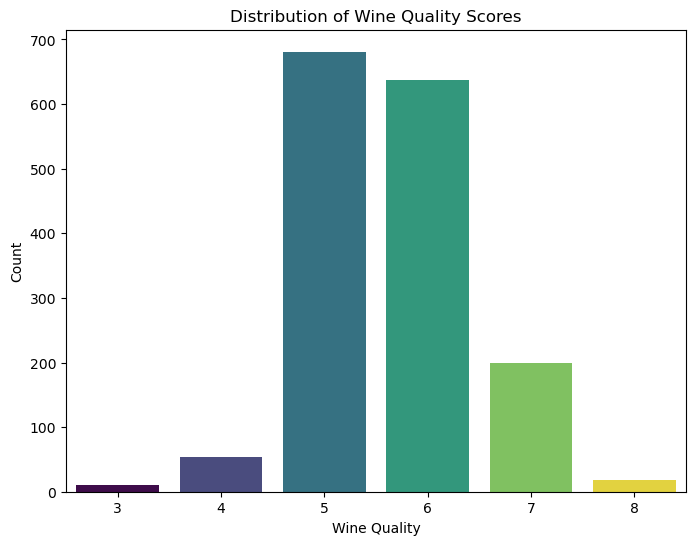

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['quality'], hue=df['quality'], palette="viridis", legend=False)
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Scores")
plt.show()


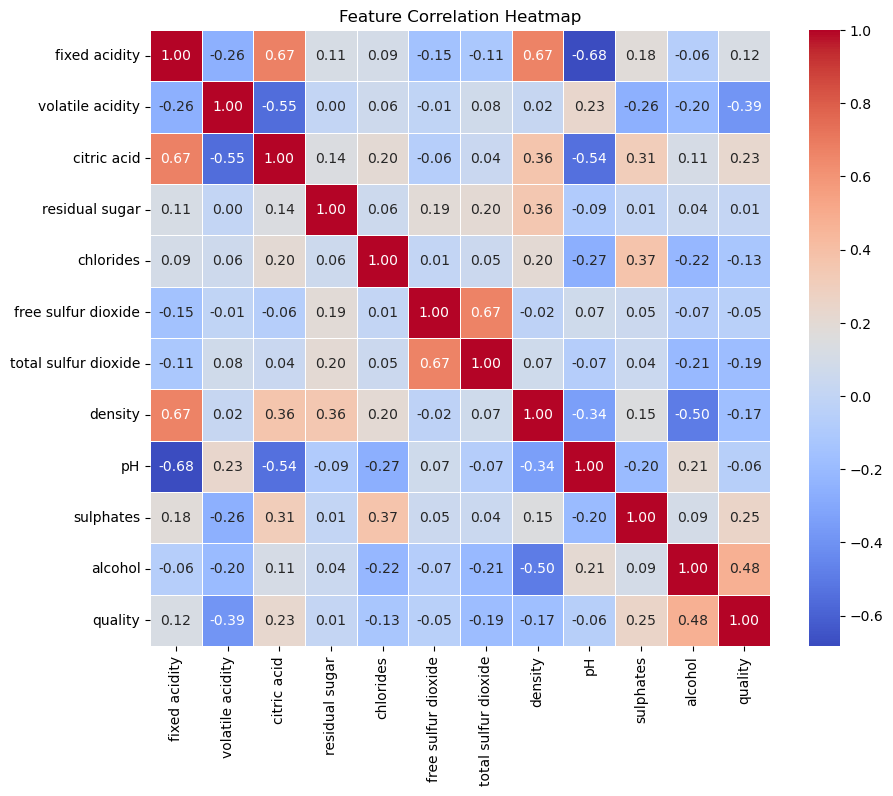

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

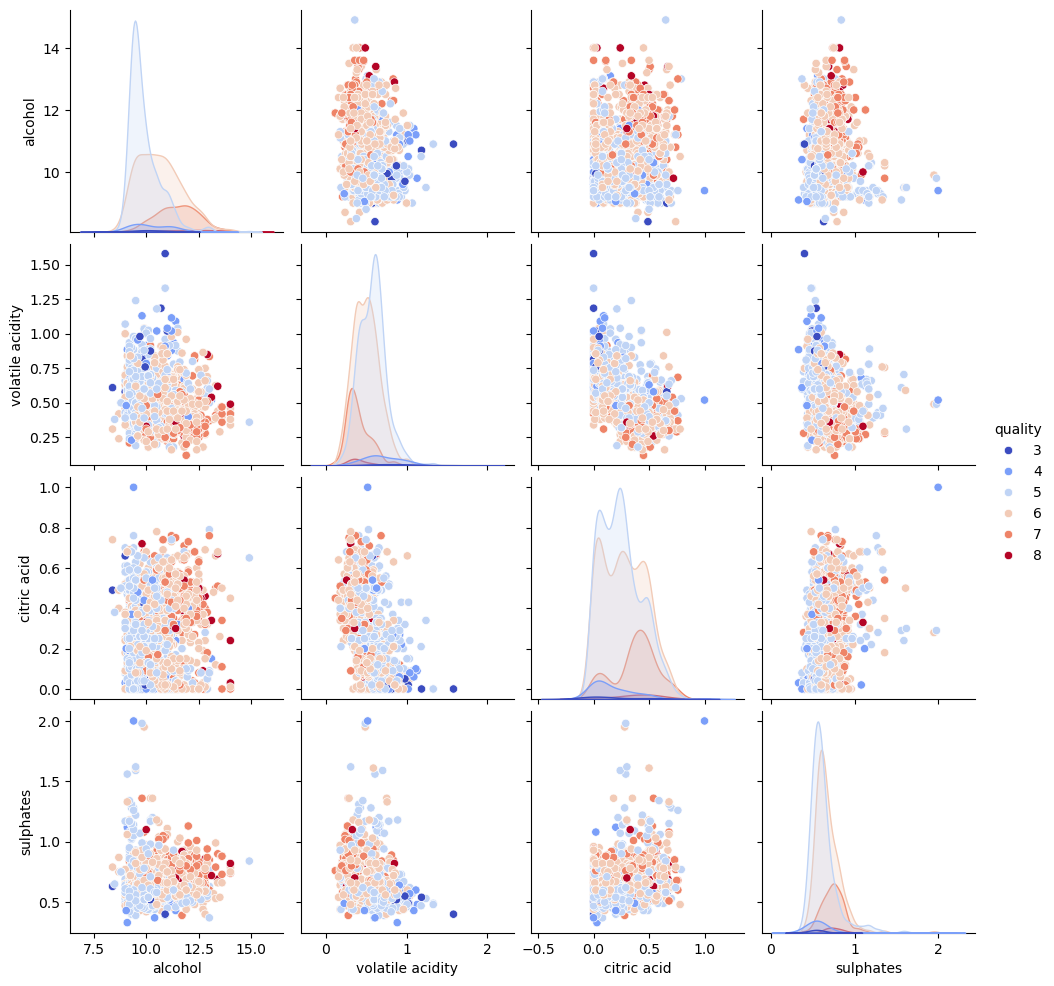

In [101]:
selected_features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'quality']
sns.pairplot(df[selected_features], hue="quality", palette="coolwarm")
plt.show()

In [102]:
# Selecting independent (X) and dependent (y) variables
X = df[['alcohol']]
y = df['quality']

# Splitting data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
# Predictions
y_pred = model.predict(X_test)

In [105]:
# Extracting model parameters
intercept = model.intercept_
coefficient = model.coef_[0]

In [106]:
# Performance evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

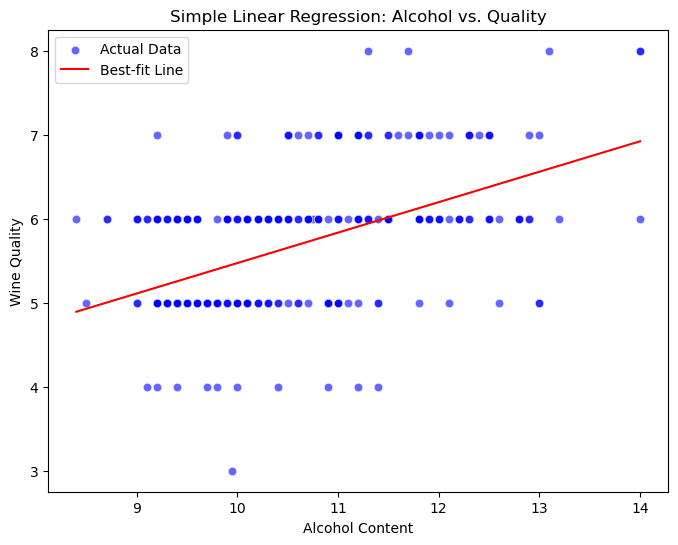

In [107]:
# Plot best-fit line
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['alcohol'], y=y_test, label="Actual Data", color="blue", alpha=0.6)
sns.lineplot(x=X_test['alcohol'], y=y_pred, color="red", label="Best-fit Line")

plt.xlabel("Alcohol Content")
plt.ylabel("Wine Quality")
plt.title("Simple Linear Regression: Alcohol vs. Quality")
plt.legend()
plt.show()

In [108]:
# Display results
print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Intercept: 1.849294204459945
Coefficient: 0.36231469352113405
Mean Squared Error (MSE): 0.4995281340730445
R-squared (R²): 0.23561797203963364
